##### Crime vs. Education

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/Matt/desktop/2005_-_2011_Graduation_Outcomes_-_Borough__-_Total_Cohort.csv')
d = pd.read_csv('/Users/Matt/desktop/New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')
c = pd.read_csv('/Users/Matt/desktop/NYPD_Arrests_Data__Historic_.csv')
df = df.drop(columns=['Total Grads Pct of cohort', 'Total Regents Num', 'Total Regents Pct of cohort',
                      'Total Regents Pct of grads', 'Advanced Regents Num', 'Advanced Regents Pct of cohort',
                      'Advanced Regents Pct of grads', 'Regents w/o Advanced Num', 'Regents w/o Advanced Pct of cohort',
                      'Regents w/o Advanced Pct of grads', 'Local Num', 'Local Pct of cohort', 'Local Pct of grads',
                      'Still Enrolled Pct of cohort', 'Dropped Out Pct of cohort'])
d = d.drop(columns=['FIPS County Code', 'NTA Code', 'NTA Name'])

In [104]:
df

,Borough,Cohort Year,Cohort Category,Total Cohort Num,Total Grads Num,Still Enrolled Num,Dropped Out Num
0,Bronx,2001,4 Year June,"11,453","4,913","3,512","2,438"
1,Bronx,2001,5 Year,"11,453","6,058","1,412","3,178"
2,Bronx,2001,6 Year,"11,453","6,360",610,"3,614"
3,Bronx,2002,4 Year June,"12,032","5,328","4,047","2,140"
4,Bronx,2002,5 Year,"12,032","6,582","1,724","3,008"
...,...,...,...,...,...,...,...
105,Staten Island,2006,4 Year August,"4,603","3,423",607,413
106,Staten Island,2006,5 Year June,"4,646","3,561",264,613
107,Staten Island,2006,5 Year August,"4,646","3,578",256,600
108,Staten Island,2007,4 Year June,"4,490","3,239",738,385


In [105]:
manhattan, queens, bronx = d.loc[(d['Borough']=='Manhattan')], d.loc[(d['Borough']=='Queens')], d.loc[(d['Borough']=='Bronx')]
brooklyn, statenIsland =  d.loc[(d['Borough']=='Brooklyn')], d.loc[(d['Borough']=='Staten Island')]
df.loc[(df['Borough']=='Manhattan') & (df['Cohort Year'] < 2006), 'Population'] = manhattan.loc[(manhattan['Year']==2000)]['Population'].sum()
df.loc[(df['Borough']=='Manhattan') & (df['Cohort Year'] >= 2006), 'Population'] = manhattan.loc[(manhattan['Year']==2010)]['Population'].sum()
df.loc[(df['Borough']=='Bronx') & (df['Cohort Year'] < 2006), 'Population'] = bronx.loc[(bronx['Year']==2000)]['Population'].sum()
df.loc[(df['Borough']=='Bronx') & (df['Cohort Year'] >= 2006), 'Population'] = bronx.loc[(bronx['Year']==2010)]['Population'].sum()
df.loc[(df['Borough']=='Queens') & (df['Cohort Year'] < 2006), 'Population'] = queens.loc[(queens['Year']==2000)]['Population'].sum()
df.loc[(df['Borough']=='Queens') & (df['Cohort Year'] >= 2006), 'Population'] = queens.loc[(queens['Year']==2010)]['Population'].sum()
df.loc[(df['Borough']=='Brooklyn') & (df['Cohort Year'] < 2006), 'Population'] = brooklyn.loc[(brooklyn['Year']==2000)]['Population'].sum()
df.loc[(df['Borough']=='Brooklyn') & (df['Cohort Year'] >= 2006), 'Population'] = brooklyn.loc[(brooklyn['Year']==2010)]['Population'].sum()
df.loc[(df['Borough']=='Staten Island') & (df['Cohort Year'] < 2006), 'Population'] = statenIsland.loc[(statenIsland['Year']==2000)]['Population'].sum()
df.loc[(df['Borough']=='Staten Island') & (df['Cohort Year'] >= 2006), 'Population'] = statenIsland.loc[(statenIsland['Year']==2010)]['Population'].sum()

In [106]:
df

,Borough,Cohort Year,Cohort Category,Total Cohort Num,Total Grads Num,Still Enrolled Num,Dropped Out Num,Population
0,Bronx,2001,4 Year June,"11,453","4,913","3,512","2,438",1332650.0
1,Bronx,2001,5 Year,"11,453","6,058","1,412","3,178",1332650.0
2,Bronx,2001,6 Year,"11,453","6,360",610,"3,614",1332650.0
3,Bronx,2002,4 Year June,"12,032","5,328","4,047","2,140",1332650.0
4,Bronx,2002,5 Year,"12,032","6,582","1,724","3,008",1332650.0
...,...,...,...,...,...,...,...,...
105,Staten Island,2006,4 Year August,"4,603","3,423",607,413,468730.0
106,Staten Island,2006,5 Year June,"4,646","3,561",264,613,468730.0
107,Staten Island,2006,5 Year August,"4,646","3,578",256,600,468730.0
108,Staten Island,2007,4 Year June,"4,490","3,239",738,385,468730.0


In [107]:
df.loc[(df['Borough']=='Manhattan'), 'Amount of Arrest'] = c.loc[(c['ARREST_BORO']=='M')]['ARREST_BORO'].count()
df.loc[(df['Borough']=='Bronx'), 'Amount of Arrest'] = c.loc[(c['ARREST_BORO']=='B')]['ARREST_BORO'].count()
df.loc[(df['Borough']=='Queens'), 'Amount of Arrest'] = c.loc[(c['ARREST_BORO']=='Q')]['ARREST_BORO'].count()
df.loc[(df['Borough']=='Brooklyn'), 'Amount of Arrest'] = c.loc[(c['ARREST_BORO']=='K')]['ARREST_BORO'].count()
df.loc[(df['Borough']=='Staten Island'), 'Amount of Arrest'] = c.loc[(c['ARREST_BORO']=='S')]['ARREST_BORO'].count()

df['Population'] = df['Population'].astype(int)
df['Amount of Arrest'] = df['Amount of Arrest'].astype(int)
df['Total Cohort Num'] = df['Total Cohort Num'].astype(str)
df['Total Cohort Num'] = df['Total Cohort Num'].str.replace(",","").astype(int)
df['Dropped Out Num'] = df['Dropped Out Num'].astype(str)
df['Dropped Out Num'] = df['Dropped Out Num'].str.replace(",","").astype(int)
df.head()

,Borough,Cohort Year,Cohort Category,Total Cohort Num,Total Grads Num,Still Enrolled Num,Dropped Out Num,Population,Amount of Arrest
0,Bronx,2001,4 Year June,11453,"4,913","3,512",2438,1332650,1097367
1,Bronx,2001,5 Year,11453,"6,058","1,412",3178,1332650,1097367
2,Bronx,2001,6 Year,11453,"6,360",610,3614,1332650,1097367
3,Bronx,2002,4 Year June,12032,"5,328","4,047",2140,1332650,1097367
4,Bronx,2002,5 Year,12032,"6,582","1,724",3008,1332650,1097367


In [108]:
def get_percent_nans(df, column_name):
    colSize = df.shape[0]
    empty = df.loc[df[column_name].isna()]
    emptySize = empty.shape[0]
    return (emptySize/colSize) * 100

for col in df.columns:
    print('The \"{}\" column has {:.2f}% empty values'.format(col, get_percent_nans(df, col)))
df

The "Borough" column has 0.00% empty values
The "Cohort Year" column has 0.00% empty values
The "Cohort Category" column has 0.00% empty values
The "Total Cohort Num" column has 0.00% empty values
The "Total Grads Num" column has 0.00% empty values
The "Still Enrolled Num" column has 0.00% empty values
The "Dropped Out Num" column has 0.00% empty values
The "Population" column has 0.00% empty values
The "Amount of Arrest" column has 0.00% empty values


,Borough,Cohort Year,Cohort Category,Total Cohort Num,Total Grads Num,Still Enrolled Num,Dropped Out Num,Population,Amount of Arrest
0,Bronx,2001,4 Year June,11453,"4,913","3,512",2438,1332650,1097367
1,Bronx,2001,5 Year,11453,"6,058","1,412",3178,1332650,1097367
2,Bronx,2001,6 Year,11453,"6,360",610,3614,1332650,1097367
3,Bronx,2002,4 Year June,12032,"5,328","4,047",2140,1332650,1097367
4,Bronx,2002,5 Year,12032,"6,582","1,724",3008,1332650,1097367
...,...,...,...,...,...,...,...,...,...
105,Staten Island,2006,4 Year August,4603,"3,423",607,413,468730,166361
106,Staten Island,2006,5 Year June,4646,"3,561",264,613,468730,166361
107,Staten Island,2006,5 Year August,4646,"3,578",256,600,468730,166361
108,Staten Island,2007,4 Year June,4490,"3,239",738,385,468730,166361


In [109]:
df.head()

,Borough,Cohort Year,Cohort Category,Total Cohort Num,Total Grads Num,Still Enrolled Num,Dropped Out Num,Population,Amount of Arrest
0,Bronx,2001,4 Year June,11453,"4,913","3,512",2438,1332650,1097367
1,Bronx,2001,5 Year,11453,"6,058","1,412",3178,1332650,1097367
2,Bronx,2001,6 Year,11453,"6,360",610,3614,1332650,1097367
3,Bronx,2002,4 Year June,12032,"5,328","4,047",2140,1332650,1097367
4,Bronx,2002,5 Year,12032,"6,582","1,724",3008,1332650,1097367


In [110]:
def q_summary_V1(numbers):
    dic = {}
    outliers = []
    num = []
    q1 = np.quantile(numbers, .25)
    q2 = np.quantile(numbers, .50)
    q3 = np.quantile(numbers, .75)
    iqr = q3 - q1
    lb, ub = q1 - (1.5*iqr), q3 + (1.5*iqr)
    for i in numbers:
        if i < lb or i > ub:
            outliers.append(i)
        else:
            num.append(i)
    minimum, maximum = np.min(num), np.max(num) 
    dic['min'], dic['q1'], dic['q2'], dic['q3'], dic['max']  = minimum, q1, q2, q3, maximum
    print("The following are outliers: ", outliers)
    return dic

In [111]:
q_summary_V1(df['Amount of Arrest'])

The following are outliers:  [166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361, 166361]


{'min': 895903,
 'q1': 895903.0,
 'q2': 1097367.0,
 'q3': 1303786.0,
 'max': 1334914}

In [113]:
q_summary_V1(df['Population'])

The following are outliers:  []


{'min': 443728,
 'q1': 1332650.0,
 'q2': 1537195.0,
 'q3': 2230386.25,
 'max': 2504700}

In [114]:
q_summary_V1(df['Total Cohort Num'])

The following are outliers:  []


{'min': 3872, 'q1': 12191.5, 'q2': 15987.0, 'q3': 19650.25, 'max': 22595}

In [115]:
q_summary_V1(df['Dropped Out Num'])

The following are outliers:  [5866]


{'min': 362, 'q1': 1762.0, 'q2': 2608.0, 'q3': 3340.0, 'max': 5359}

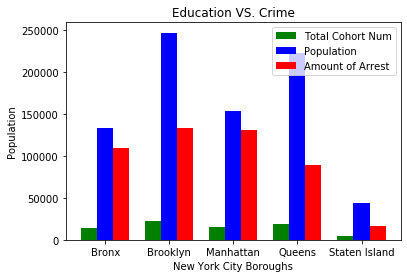

In [147]:
dfMedian = df.groupby('Borough').median()
dfMedian.reset_index(inplace=True)
locations = np.arange(dfMedian.shape[0])
labs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
width = 0.25
plt.bar(locations-width, dfMedian['Total Cohort Num'], width = width, label='Total Cohort Num', color='green')
#plt.bar(locations, dfMedian['Dropped Out Num'], width = width, label='Dropped Out Num', color='blue')
plt.bar(locations, dfMedian['Population']/10, width = width, label='Population', color='blue')
plt.bar(locations+width, dfMedian['Amount of Arrest']/10, width = width, label='Amount of Arrest', color='red')
plt.ylabel('Population')
plt.xlabel('New York City Boroughs')
plt.title('Education VS. Crime')
plt.xticks(locations, labels=labs)
plt.legend()
plt.show()